# **Proyek Machine Learning - Prediksi Harga Berlian (Diamond)**

---

**Mellania Permata**

**Submission Machine Learning Terapan - Predictive Analytics**

## **Pendahuluan**

Proyek ini bertujuan untuk membangun **model predictive analytics** yang dapat memprediksi harga berlian (diamond) berdasarkan karakteristik utamanya, seperti karat, warna, kejernihan, potongan, dan dimensi fisik lainnya. Harga berlian sangat dipengaruhi oleh kombinasi atribut tersebut, dan kesalahan dalam penilaian harga dapat merugikan pihak penjual maupun pembeli.

## **Import Library**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## **1. Data Understanding**

Pada bagian ini, akan dilakukan load dataset dan Eksplorasi Dataset (EDA)

### 1.1. Data Loading

In [2]:
# load the dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
# Melihat informasi data
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**Penjelasan variabel dataset :**     

- Harga dalam dolar Amerika Serikat ($) adalah fitur target.
- carat: merepresentasikan bobot (weight) dari diamonds (0.2-5.01), digunakan sebagai ukuran dari batu permata dan perhiasan.
- cut: merepresentasikan kualitas pemotongan diamonds (Fair, Good, Very Good, Premium, and Ideal).
- color: merepresentasikan warna, dari J (paling buruk) ke D (yang terbaik).
- clarity: merepresentasikan seberapa jernih diamonds (I1 (paling buruk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (terbaik))
- x: merepresentasikan panjang diamonds dalam mm (0-10.74).
- y: merepresentasikan lebar diamonds dalam mm (0-58.9).
- z: merepresentasikan kedalaman diamonds dalam mm (0-31.8).
- depth: merepresentasikan z/mean(x, y) = 2 * z/(x + y) (43-79).
- table: merepresentasikan lebar bagian atas berlian relatif terhadap titik terlebar 43-95).

In [4]:
#Deskripsi Statistik Data
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### Memeriksa Missing Value

In [5]:
x = (diamonds.x == 0).sum()
y = (diamonds.y == 0).sum()
z = (diamonds.z == 0).sum()

print("Nilai 0 di kolom x ada: ", x)
print("Nilai 0 di kolom y ada: ", y)
print("Nilai 0 di kolom z ada: ", z)

Nilai 0 di kolom x ada:  8
Nilai 0 di kolom y ada:  7
Nilai 0 di kolom z ada:  20


Pada kolom x ditemukan 8 data dengan nilai 0, Pada kolom y ditemukan 7 data dengan nilai 0, dan Pada kolom z ditemukan 20 data dengan nilai 0.

In [6]:
diamonds.loc[(diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


#### Memeriksa Outlier

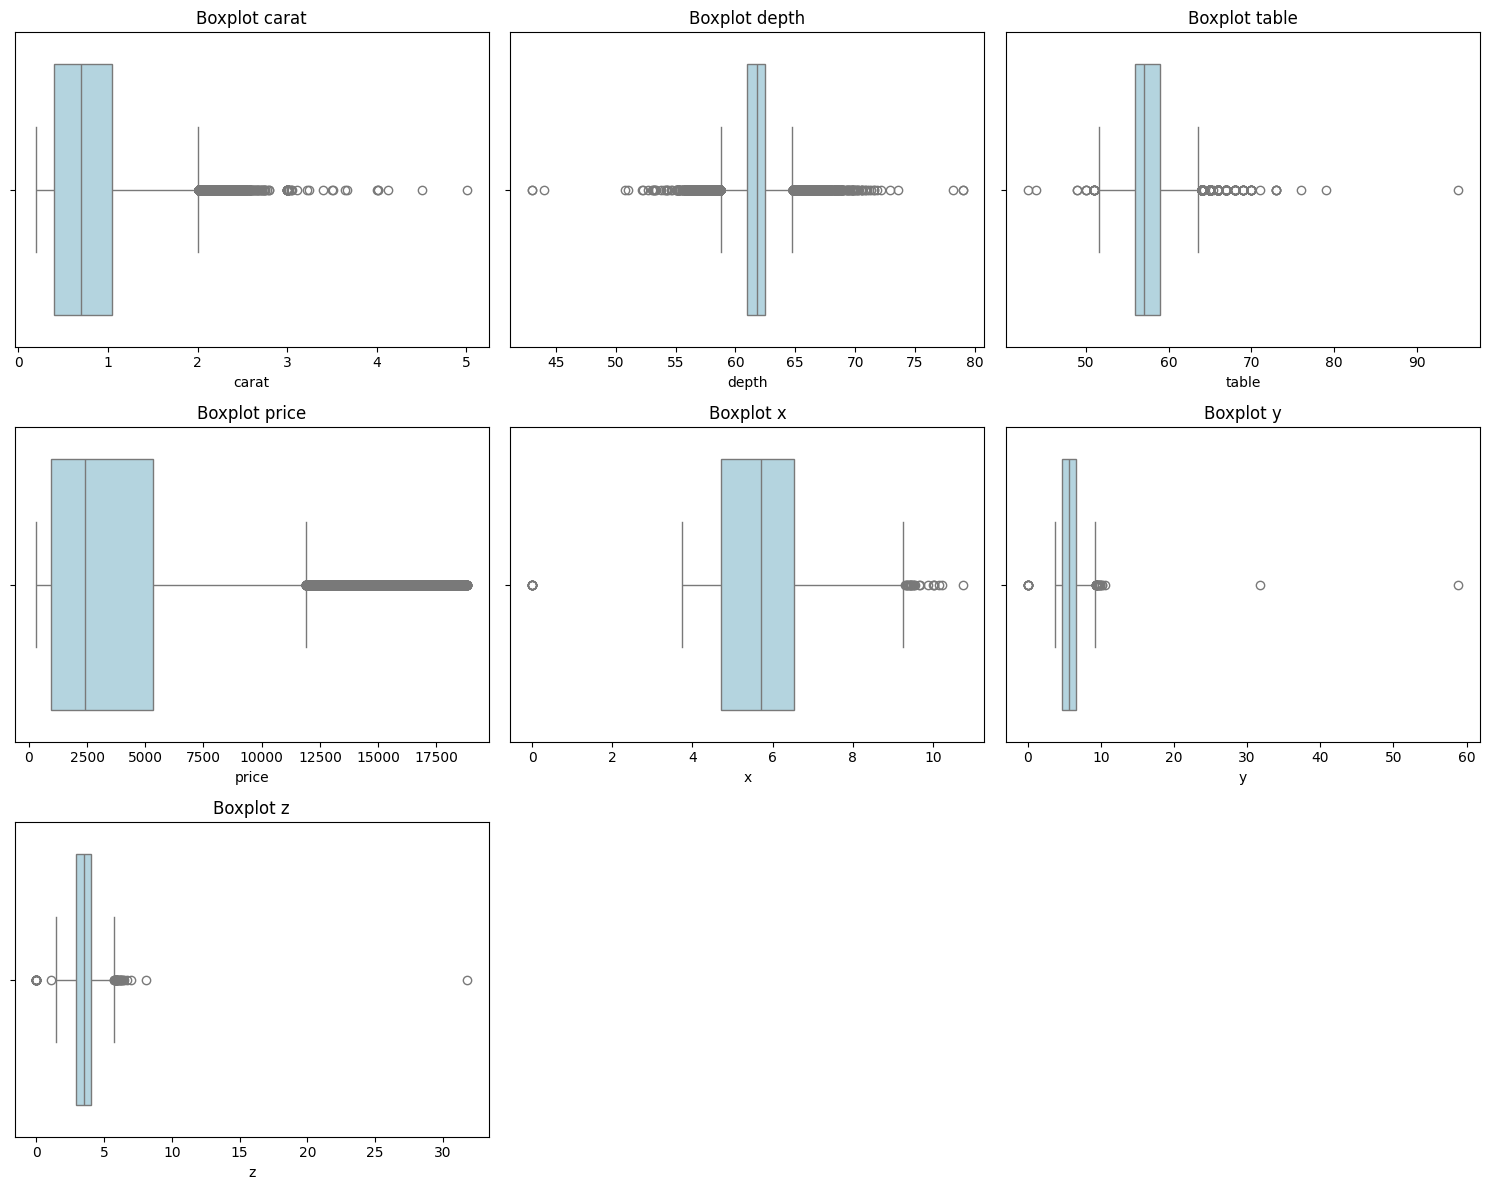

In [7]:
def cek_outlier_boxplot(diamonds, cols_per_row):
    df_numerik = diamonds.select_dtypes(include=['float64', 'int64'])
    kolom = df_numerik.columns
    jumlah_kolom = len(kolom)

    # Hitung jumlah baris untuk grid
    baris = int(np.ceil(jumlah_kolom / cols_per_row))

    # Buat figure dan axes
    fig, axes = plt.subplots(baris, cols_per_row, figsize=(5 * cols_per_row, 4 * baris))
    axes = axes.flatten()

    # Loop dan buat boxplot
    for i, col in enumerate(kolom):
        sns.boxplot(x=df_numerik[col], ax=axes[i], color='lightblue')
        axes[i].set_title(f'Boxplot {col}')

    # Matikan subplot kosong jika jumlah kolom tidak pas dengan grid
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

cek_outlier_boxplot(diamonds, 3)

#### Memeriksa Data Duplikat

In [8]:
cek_duplikat = diamonds.duplicated().sum()
print("Jumlah data duplikat :", cek_duplikat)

Jumlah data duplikat : 146


### 1.2. Exploratory Data Analysis

Pada Explorasi Data Analysis akan dilakukan 2 Analisa, yaitu :    
1. Univariate Analysis
2. Multivariate Analysis

#### 1.2.1 Univariate Analysis

Mengelompokkan fitur

In [9]:
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

##### Analisa Fitur Cut

           jumlah sampel  persentase
cut                                 
Ideal              21551        40.0
Premium            13791        25.6
Very Good          12082        22.4
Good                4906         9.1
Fair                1610         3.0


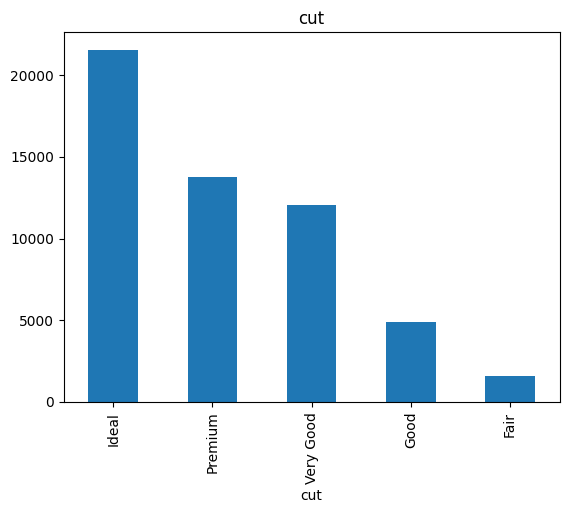

In [10]:
feature = categorical_features[0]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terdapat 5 kategori pada fitur Cut, secara berurutan dari jumlahnya yang paling banyak yaitu: Ideal, Premium, Very Good, Good, dan Fair. Dari data persentase dapat kita simpulkan bahwa lebih dari 60% sampel merupakan diamonds tipe grade tinggi, yaitu grade Ideal dan Premium

##### Analisis Fitur Color

       jumlah sampel  persentase
color                           
G              11292        20.9
E               9797        18.2
F               9542        17.7
H               8304        15.4
D               6775        12.6
I               5422        10.1
J               2808         5.2


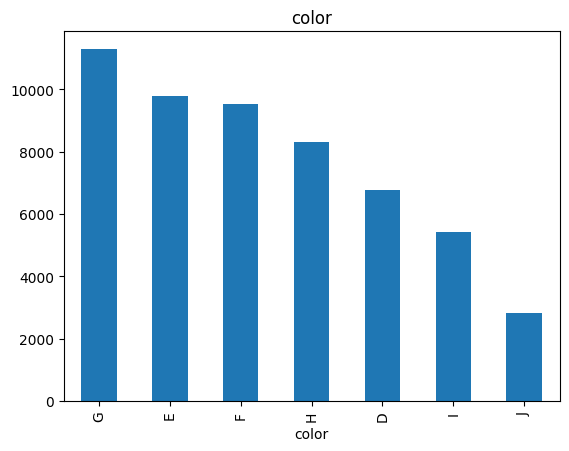

In [11]:
feature = categorical_features[1]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan deskripsi variabel, urutan kategori warna dari yang paling buruk ke yang paling bagus adalah J, I, H, G, F, E, dan D. Dari grafik di atas, dapat kita simpulkan bahwa sebagian besar grade berada pada grade menengah, yaitu G, F, H.


##### Analisis Fitur Clarity

         jumlah sampel  persentase
clarity                           
SI1              13065        24.2
VS2              12258        22.7
SI2               9194        17.0
VS1               8171        15.1
VVS2              5066         9.4
VVS1              3655         6.8
IF                1790         3.3
I1                 741         1.4


<Axes: title={'center': 'clarity'}, xlabel='clarity'>

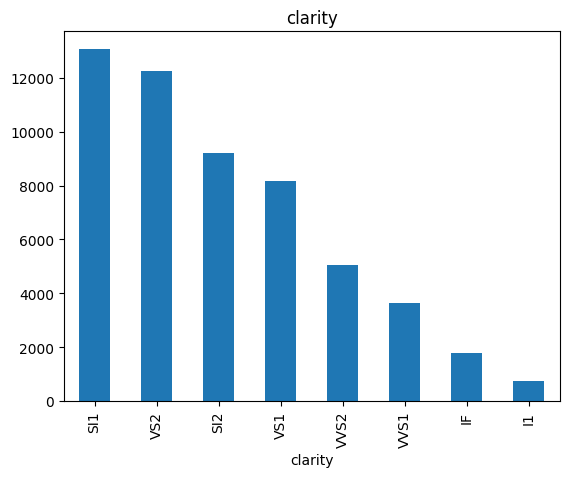

In [12]:
feature = categorical_features[2]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Berdasarkan informasi dari deskripsi variabel, fitur Clarity terdiri dari 8 kategori dari yang paling buruk ke yang paling baik, yaitu: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, dan IF

##### Analisis Numerikal Feature

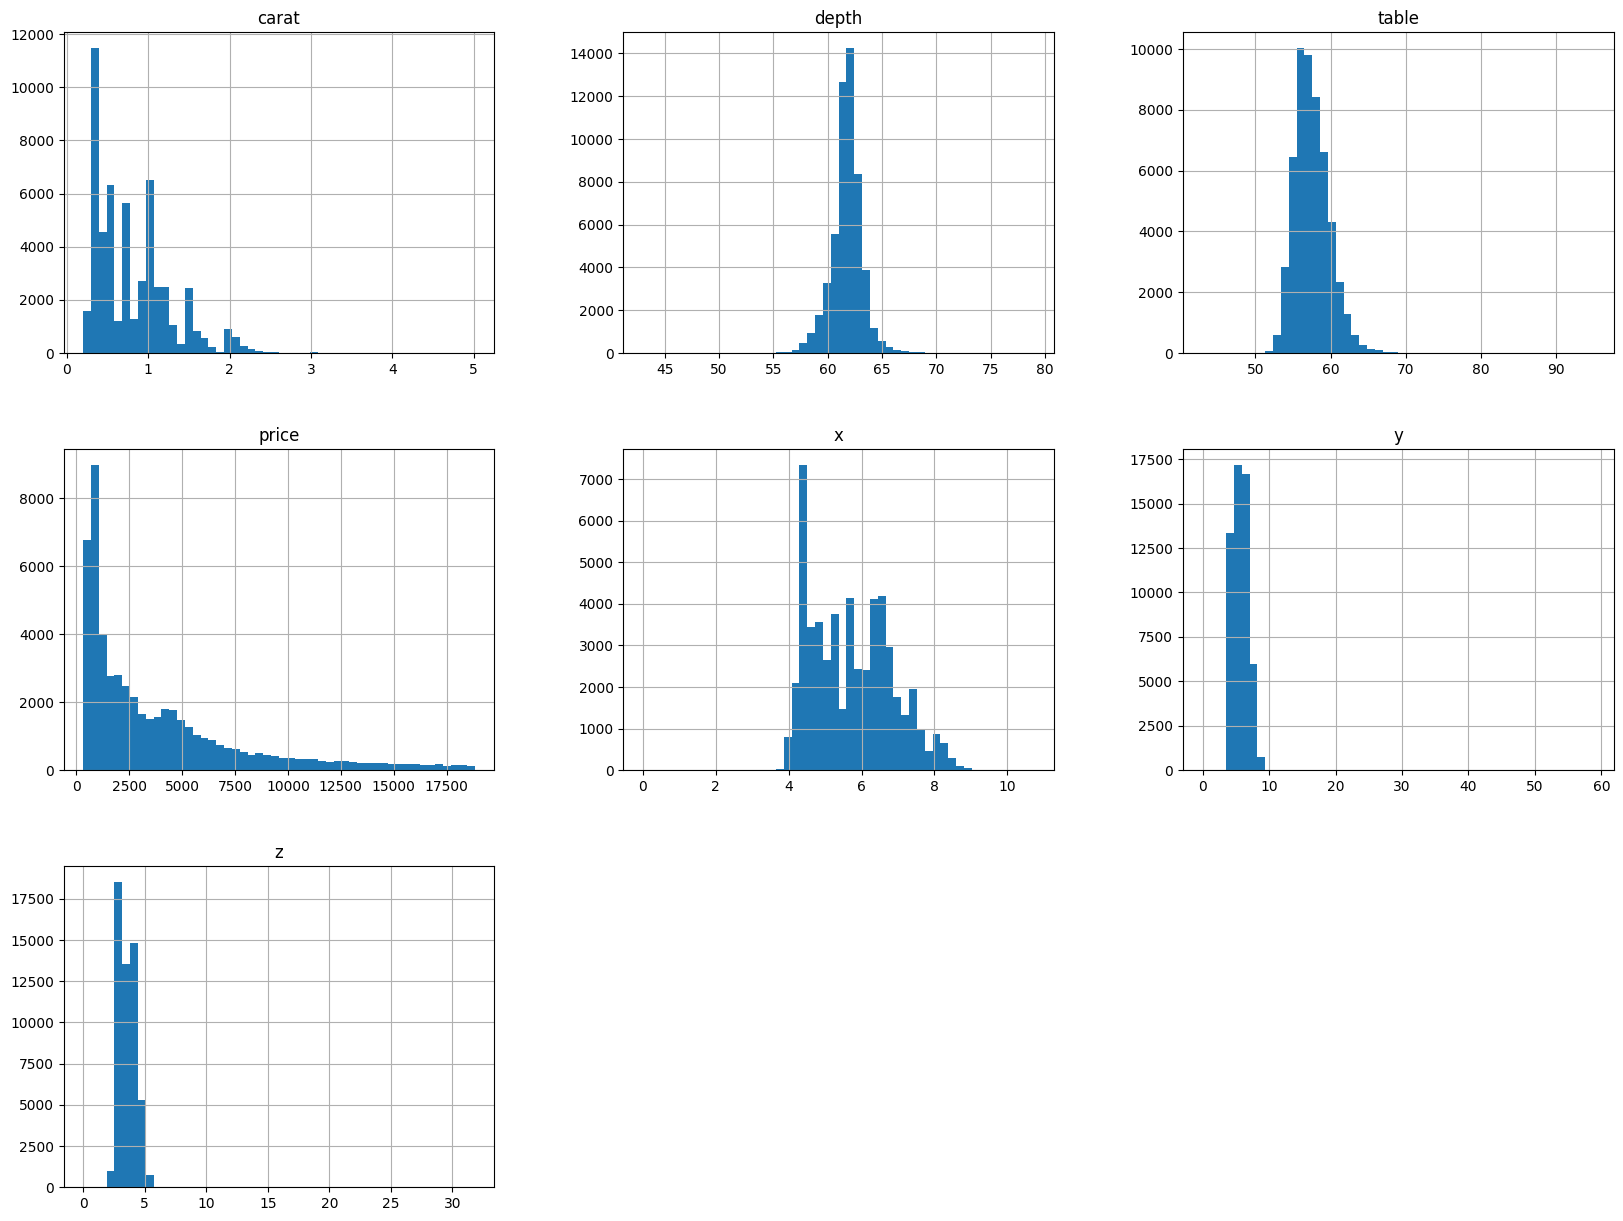

In [13]:
diamonds.hist(bins=50, figsize=(20,15))
plt.show()

**Insight :**

Mari amati histogram di atas, khususnya histogram untuk variabel "price" yang merupakan fitur target (label) pada data kita. Dari histogram "price", kita bisa memperoleh beberapa informasi, antara lain:

- Peningkatan harga diamonds sebanding dengan penurunan jumlah sampel. Hal ini dapat kita lihat jelas dari histogram "price" yang grafiknya mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu y).
- Rentang harga diamonds cukup tinggi yaitu dari skala ratusan dolar Amerika hingga sekitar $11800

- Setengah harga berlian bernilai di bawah $2500.
- Distribusi harga miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.

#### 1.2.2. Multivariate Analysis

##### Analisis Categorical Feature

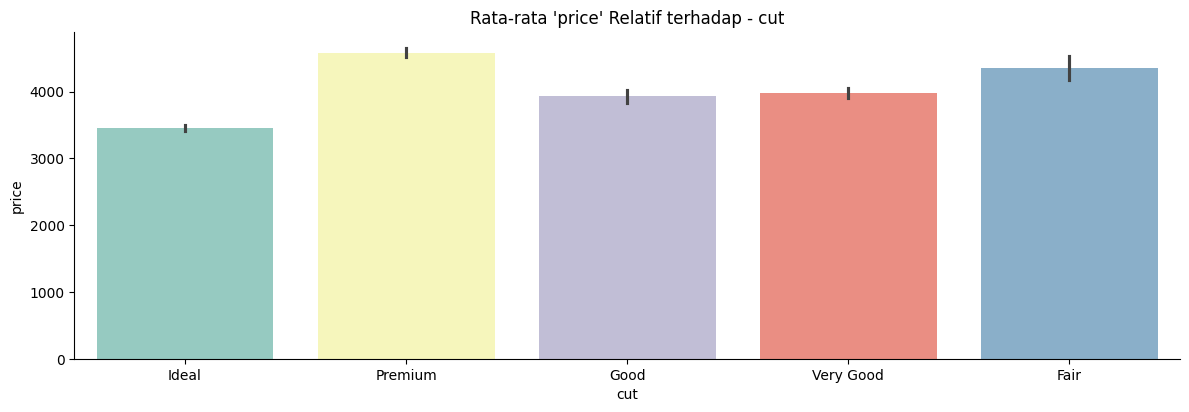

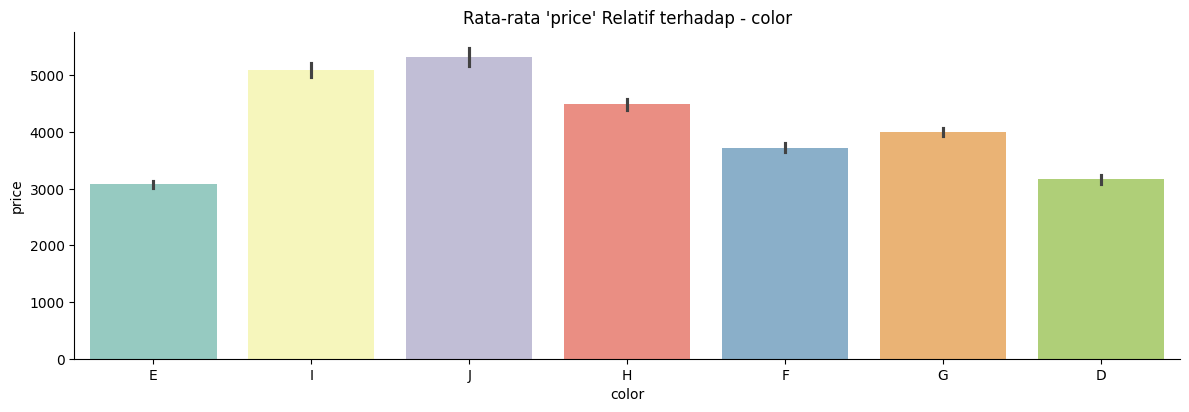

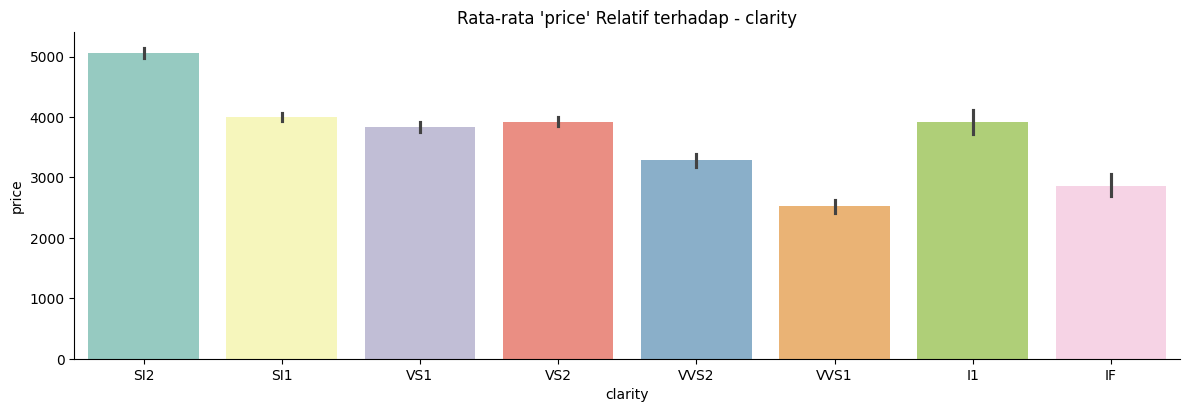

In [14]:
cat_features = diamonds.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

**Insight**

- Pada fitur ‘cut’, rata-rata harga cenderung mirip. Rentangnya berada antara 3500 hingga 4500. Grade tertinggi yaitu grade Ideal memiliki harga rata-rata terendah diantara grade lainnya. Sehingga, fitur cut memiliki pengaruh atau dampak yang kecil terhadap rata-rata harga.
- Pada fitur ‘color’, semakin rendah grade warna, harga diamonds justru semakin tinggi. Dari sini dapat disimpulkan bahwa warna memiliki pengaruh yang rendah terhadap harga.
- Pada fitur ‘clarity’, secara umum, diamond dengan grade lebih rendah memiliki harga yang lebih tinggi. Hal ini berarti bahwa fitur ‘clarity’ memiliki pengaruh yang rendah terhadap harga.
- Kesimpulan akhir, fitur kategori memiliki pengaruh yang rendah terhadap harga.

##### Analisis Numerikal Feature (Multivariate Analysis)

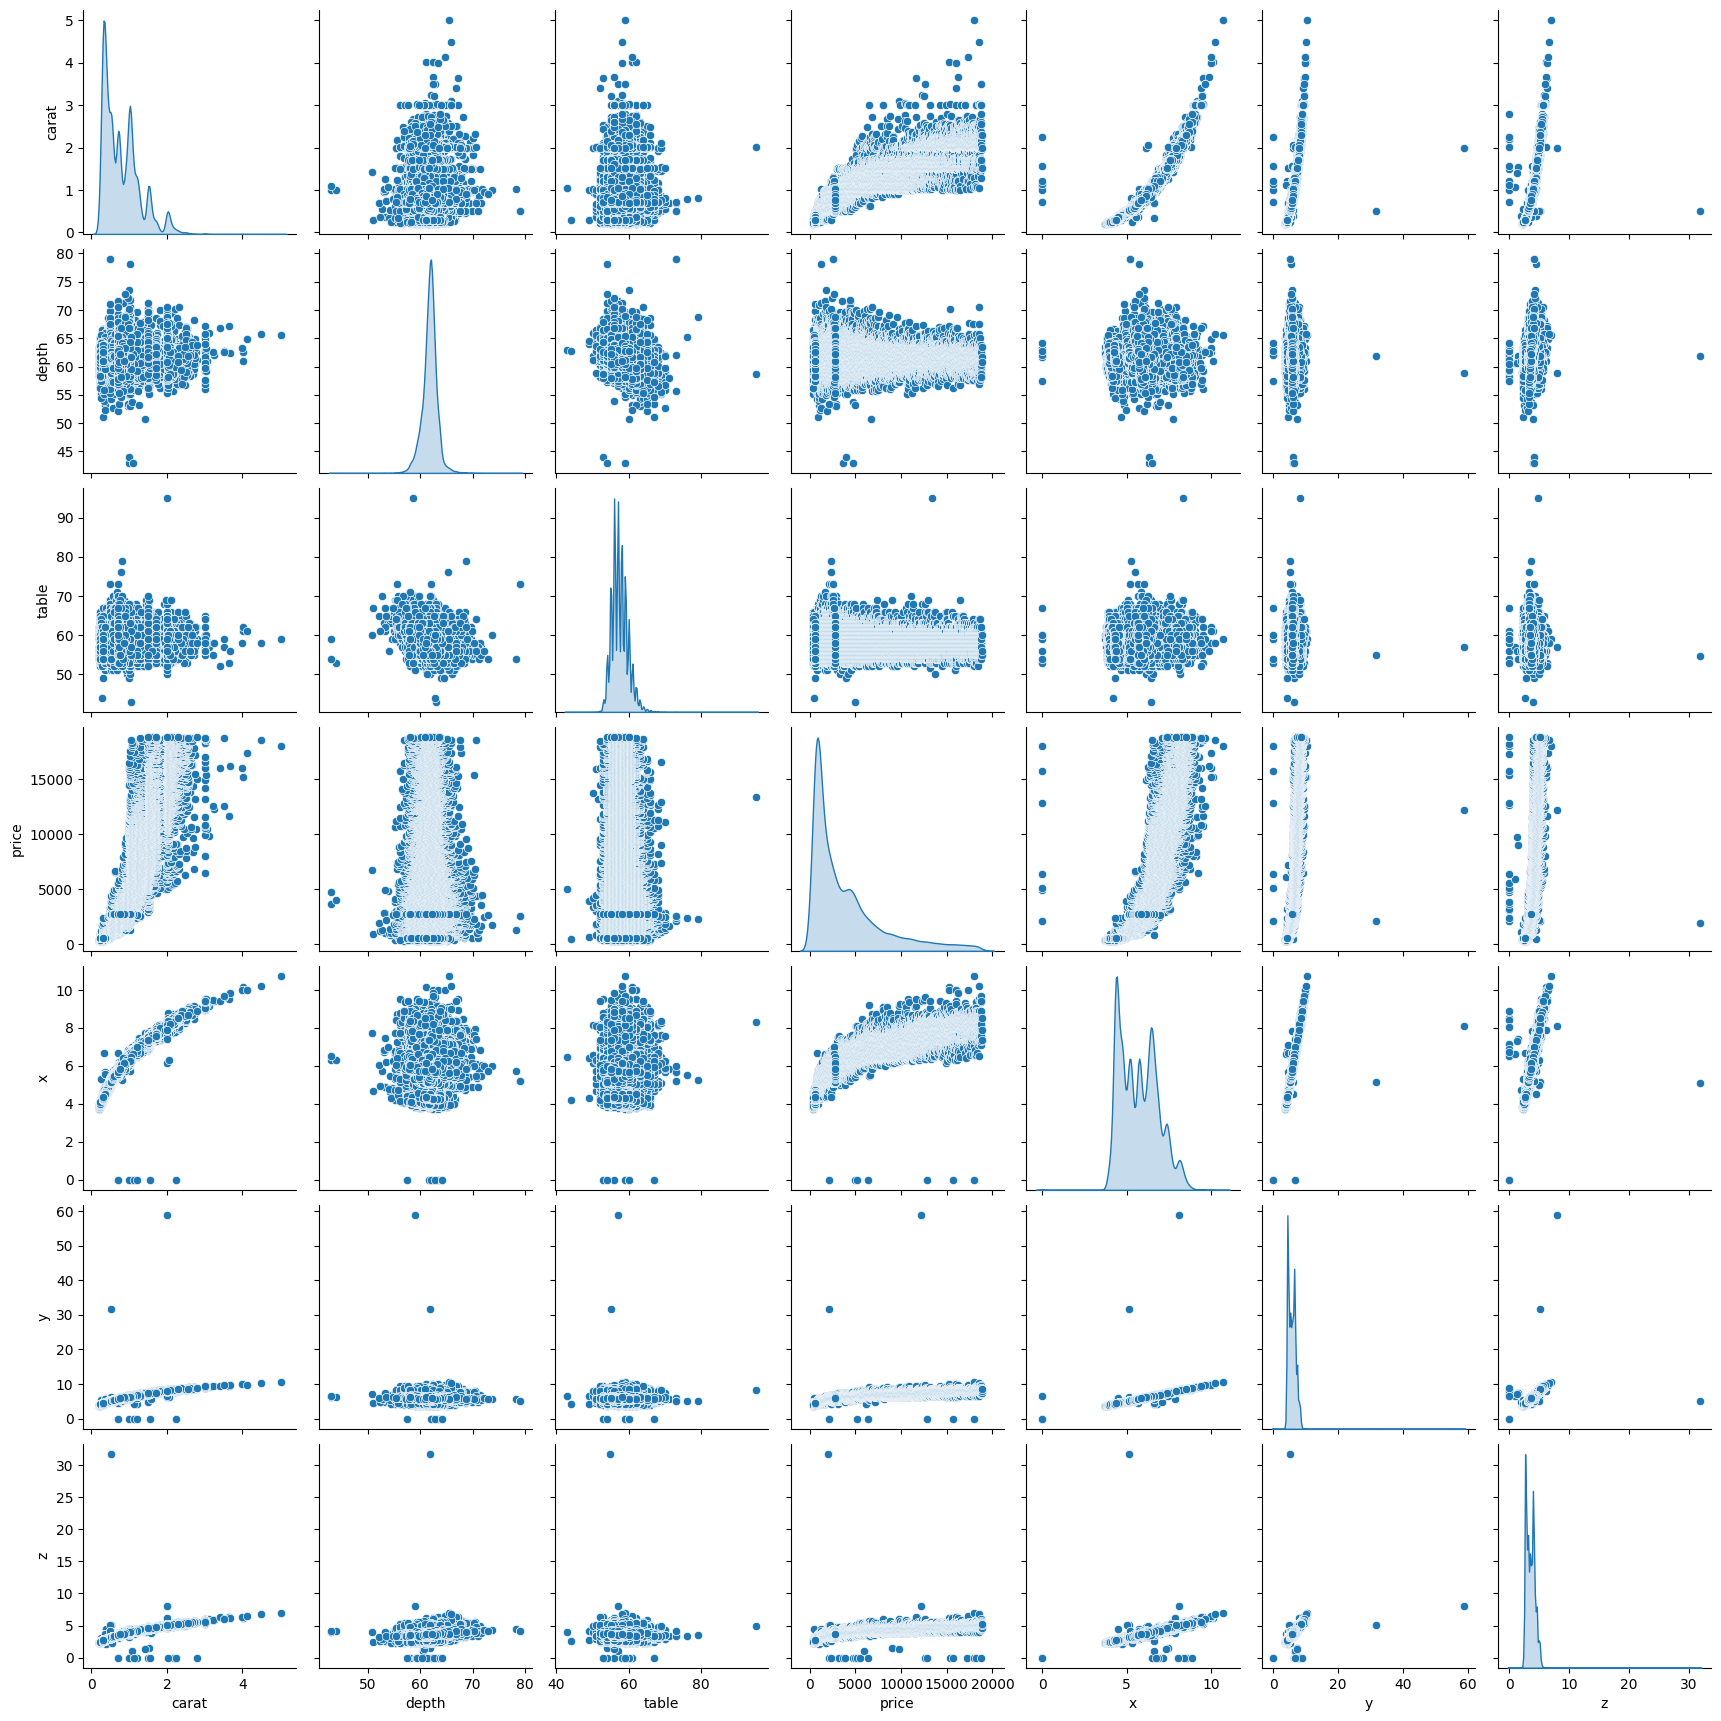

In [15]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(diamonds, diag_kind = 'kde')

##### Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

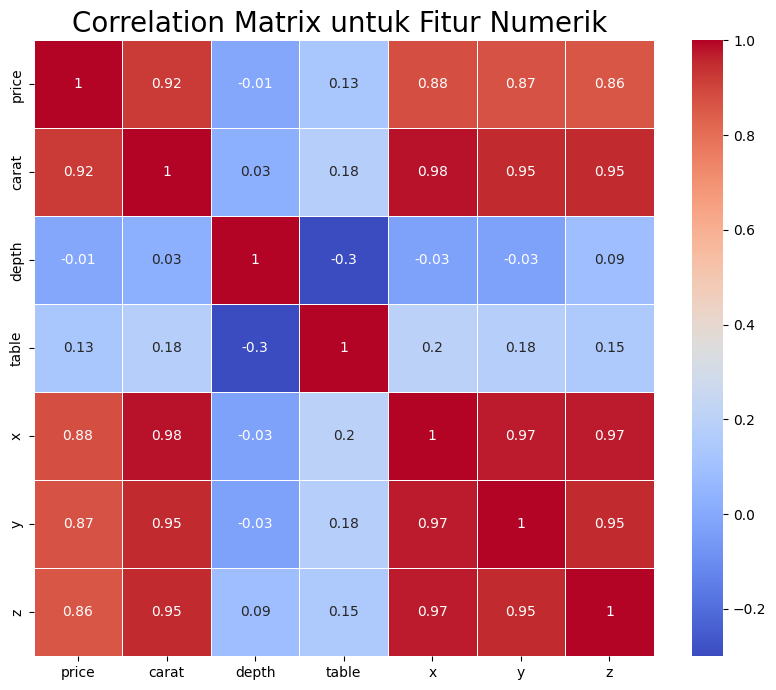

In [16]:
plt.figure(figsize=(10, 8))
correlation_matrix = diamonds[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

**Insight :**

fitur ‘carat’, ‘x, ‘y’, dan ‘z’ memiliki skor korelasi yang besar (di atas 0.9) dengan fitur target ‘price’. Artinya, fitur 'price' berkorelasi tinggi dengan keempat fitur tersebut. Sementara itu, fitur ‘depth’ memiliki korelasi yang sangat kecil (0.01). Sehingga, fitur tersebut dapat di-drop.

## **2. Data Preparation**

### 2.1. Menangani Missing Value

In [17]:
# Drop baris dengan nilai 'x', 'y', dan 'z' = 0
diamonds = diamonds.loc[(diamonds[['x','y','z']]!=0).all(axis=1)]

In [18]:
#cek kembali missing value
diamonds.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


### 2.2. Menangani Outlier

In [19]:
# Ambil hanya kolom numerikal
numeric_cols = diamonds.select_dtypes(include='number').columns
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = diamonds[numeric_cols].quantile(0.25)
Q3 = diamonds[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((diamonds[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (diamonds[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
diamonds = diamonds[filter_outliers]

# Cek ukuran dataset setelah outlier dihapus
diamonds.shape

(47524, 10)

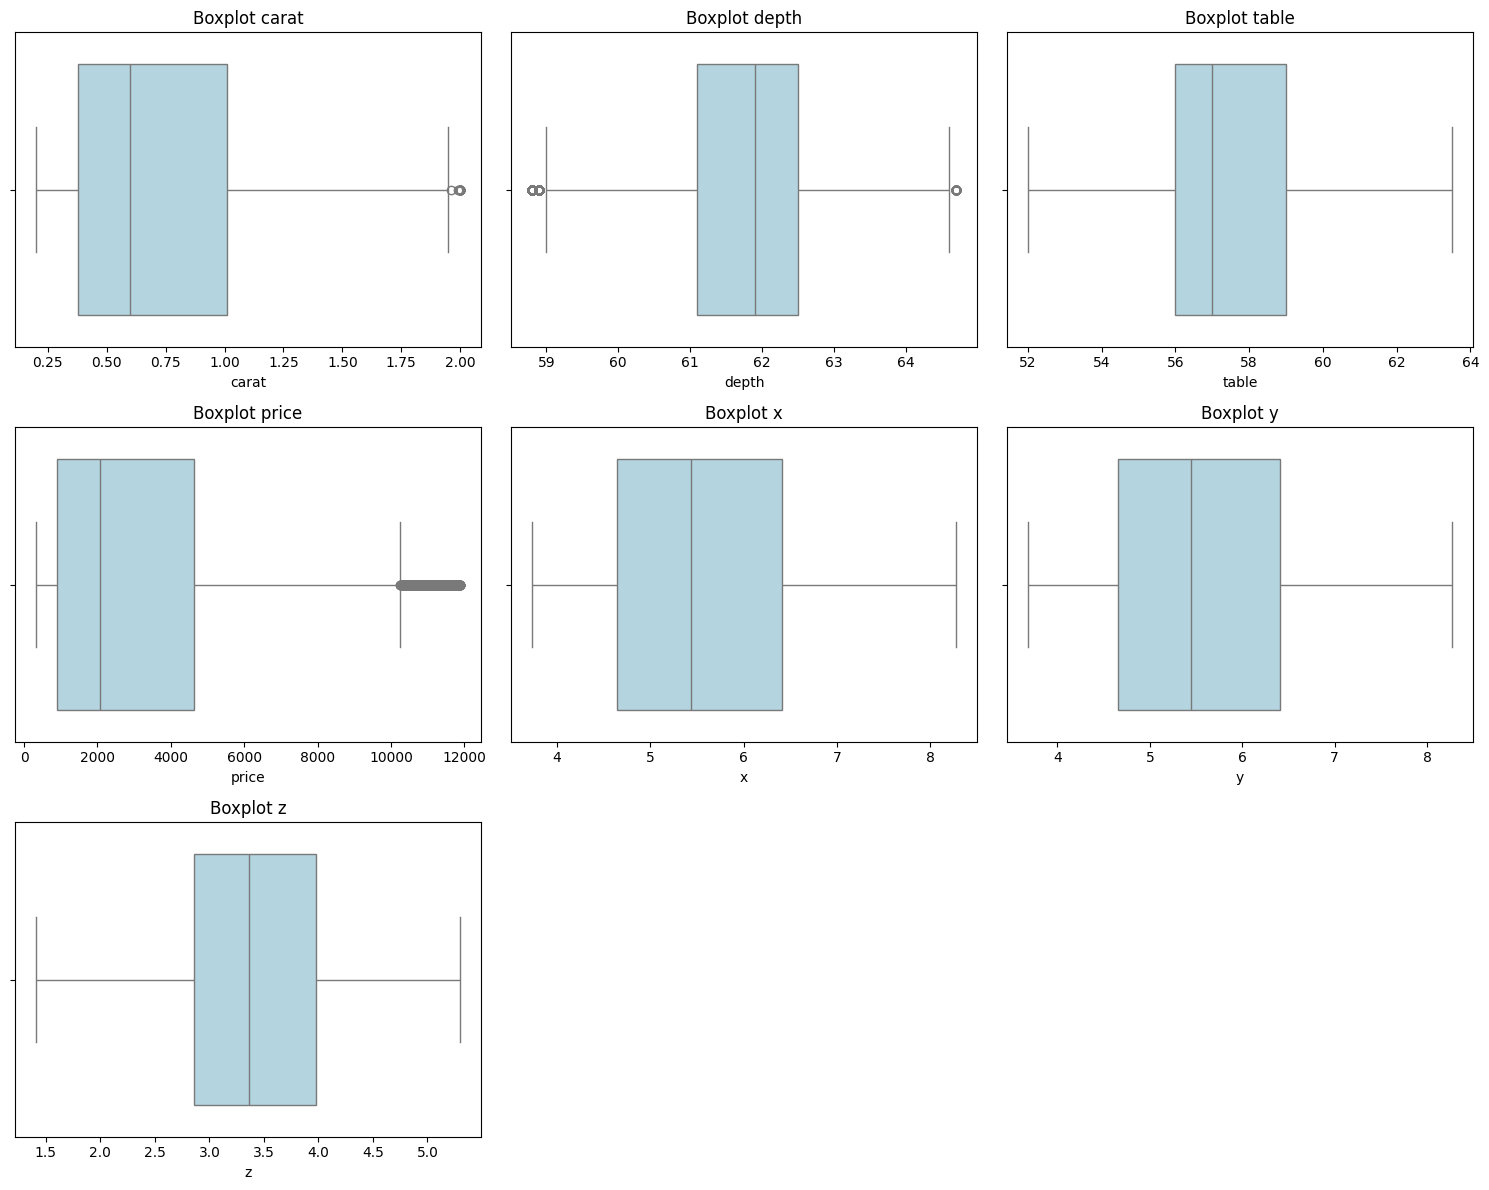

In [20]:
# Melihat kembali outlier
def cek_outlier_boxplot(diamonds, cols_per_row):
    df_numerik = diamonds.select_dtypes(include=['float64', 'int64'])
    kolom = df_numerik.columns
    jumlah_kolom = len(kolom)

    # Hitung jumlah baris untuk grid
    baris = int(np.ceil(jumlah_kolom / cols_per_row))

    # Buat figure dan axes
    fig, axes = plt.subplots(baris, cols_per_row, figsize=(5 * cols_per_row, 4 * baris))
    axes = axes.flatten()

    # Loop dan buat boxplot
    for i, col in enumerate(kolom):
        sns.boxplot(x=df_numerik[col], ax=axes[i], color='lightblue')
        axes[i].set_title(f'Boxplot {col}')

    # Matikan subplot kosong jika jumlah kolom tidak pas dengan grid
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

cek_outlier_boxplot(diamonds, 3)

### 2.3. Menangani Data Duplikat

In [21]:
diamonds.drop_duplicates()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### 2.4. Encoding Fitur Categorical

In [22]:
from sklearn.preprocessing import  OneHotEncoder
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity')],axis=1)
diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)
diamonds.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
5,0.24,62.8,57.0,336,3.94,3.96,2.48,False,False,False,...,False,True,False,False,False,False,False,False,False,True


### 2.5. Reduksi Dimensi PCA

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(diamonds[['x','y','z']])
princ_comp = pca.transform(diamonds[['x','y','z']])

In [24]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

In [25]:
pca = PCA(n_components=1, random_state=123)
pca.fit(diamonds[['x','y','z']])
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('x','y','z')]).flatten()
diamonds.drop(['x','y','z'], axis=1, inplace=True)

### 2.6. Pembagian Data

In [26]:
from sklearn.model_selection import train_test_split

X = diamonds.drop(["price"],axis =1)
y = diamonds["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [27]:
# Cek jumlah data
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 47524
Total # of sample in train dataset: 42771
Total # of sample in test dataset: 4753


### 2.7. Standarisasi Data

In [28]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
536,-0.026226,0.864091,0.143464
21293,1.348407,1.359644,1.353588
45577,-0.511390,-0.622566,-0.372761
37379,-0.834833,-0.622566,-0.905790
38240,-0.861787,-0.622566,-0.813165


## **3. Modeling**

Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan, antara lain:

1. K-Nearest Neighbor
2. Random Forest
3. Boosting Algorithm

In [30]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

### 3.1. Model KNN

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Berikut nilai parameter yang digunakan pada pemodelan diatas :    
- n_neighbors = 10

### 3.2. Model Random Forest

In [32]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Berikut nilai parameter yang digunakan pada pemodelan diatas :

- n_estimators = 50
- max_depth = 16
- random_state = 55
- n_jobs = -1

### 3.3. Model Boosting (Adaboost)

In [33]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

Berikut nilai parameter yang digunakan pada pemodelan diatas :

learning_rate = 0.05
random_state = 55

## **4. Evaluasi**

Metrik yang akan kita gunakan pada prediksi ini adalah MSE atau Mean Squared Error yang menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi

In [34]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,270.694283,2355.378862
RF,49.925963,1400.63336
Boosting,904.838013,3805.627436


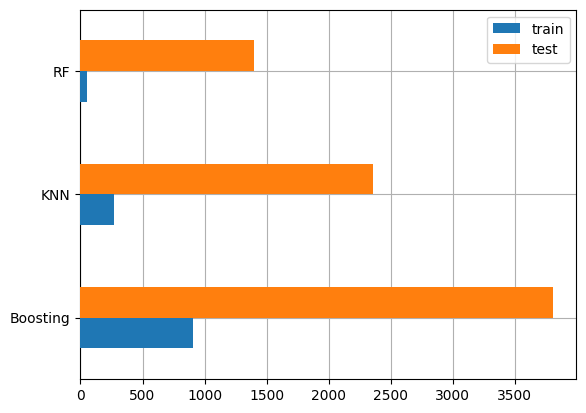

In [35]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

**Hasil Evaluasi :**    
Dari gambar di atas, terlihat bahwa, model Random Forest (RF) memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma Boosting memiliki eror yang paling besar (berdasarkan grafik, angkanya di atas 800). Sehingga model RF yang akan kita pilih sebagai model terbaik untuk melakukan prediksi harga diamonds.

**Prediksi**

In [36]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
35096,886,1910.3,1660.9,2743.6


Terlihat bahwa prediksi dengan Random Forest (RF) memberikan hasil yang paling mendekati.